<a href="https://colab.research.google.com/github/tanguy-linard/2024_MLEES/blob/main/Copie_de_S3_1_Dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

<img src='https://unils-my.sharepoint.com/:i:/g/personal/tom_beucler_unil_ch/EX7KlNGWYypLnH_53OnJR6oBjfgb_gCZ4gmnOeR68a6zMA?download=1'>
<center> Caption: <i>Denise diagnoses an overheated CPU at our data center in The Dalles, Oregon. <br> For more than a decade, we have built some of the world's most efficient servers.</i> <br> Photo from the <a href='https://www.google.com/about/datacenters/gallery/'>Google Data Center gallery</a> </center>

*Our world is increasingly filled with data from all sorts of sources, including environmental data. Can we reduce the data to a reduced, meaningful space to save on computation time and increase explainability?*

This notebook will be used in the lab session for week 4 of the course, covers Chapters 8 of Géron, and builds on the [notebooks made available on _Github_](https://github.com/ageron/handson-ml2).

Need a reminder of last week's labs? Click [_here_](https://colab.research.google.com/github/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/Week_3_Decision_Trees_Random_Forests_SVMs.ipynb) to go to notebook for week 3 of the course.

**Notebook Setup**

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Dimensionality Reduction using PCA

This week we'll be looking at how to reduce the dimensionality of a large dataset in order to improve our classifying algorithm's performance! With that in mind, let's being the exercise by loading the MNIST dataset.

## Q1) Load the input features and truth variable into X and y, then split the data into a training and test dataset using scikit's train_test_split method. Use *test_size=0.15*, and remember to set the random state to *rnd_seed!*

*Hint 1: The `'data'` and `'target'` keys for mnist will return X and y.*

*Hint 2: [Here's the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for train/test split.*

In [2]:
# Load the mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
# Read in the mnist digit images and corresponding numbers
# ---------------------------------------------------------------------------
# The procedure here is similar to the notebooks we did last week. Use Hint 1 to store the input and target data.
X = mnist['data']
y = mnist['target']

In [6]:
from typing import TextIO
# Import train_test_split() to create your training and test sets
# ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Now separate your X and y into training and test sets (use train_test_split)
# ---------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=rnd_seed) # (data,target,test_size,random_state)

We now once again have a training and testing dataset with which to work with. Let's try training a random forest tree classifier on it. You've had experience with them before, so let's have you import the `RandomForestClassifier` from sklearn and instantiate it.

## Q2) Import the `RandomForestClassifier` model from sklearn. Then, instantiate it with 100 estimators and set the random state to *rnd_seed!*

*Hint 1: [Here's the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for `RandomForestClassifier`*

*Hint 2: [Here's the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for train/test split.*

*Hint 3: If you're still confused about **instantiation**, there's a [blurb on wikipedia](https://en.wikipedia.org/wiki/Instance_(computer_science)) describing it in the context of computer science.*

In [7]:
# Import RandomForestClassifier here.
# ---------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Here we initiate a RF classifier objects with custom settings: 100 estimators, random_state=rnd_seed
# ------------------------------------------------------------------------------------------------------
rnd_clf = RandomForestClassifier(n_estimators=100, #Number of estimators
                random_state=rnd_seed) #Random State

We're now going to measure how quickly the algorithm is fitted to the mnist dataset! To do this, we'll have to import the `time` library. With it, we'll be able to get a timestamp immediately before and after we fit the algorithm, and we'll get the time by calculating the difference.

## Q3) Import the time library and calculate how long it takes to fit the `RandomForestClassifier` model.

*Hint 1: [Here's the documentation](https://docs.python.org/3/library/time.html#time.time) to the function used for getting timestamps*

*Hint 2: [Here's the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) for the fitting method used in `RandomForestClassifier`.*

In [9]:
import time

In [11]:
# Use a function in time (check documentation) to load **current** time before training the RF classifier
# ------------------------------------------------------------------------------------------------------
t0 = time.time()

# Train the RF classifier
# ------------------------------------------------------------------------------------------------------
rnd_clf.fit(X_train, y_train)

# Use the same function for t0 to load **current** time **after** training the RF classifier
# ------------------------------------------------------------------------------------------------------
t1 = time.time()

In [12]:
# Run this as is, how many seconds did it take to train the classifier?
# ------------------------------------------------------------------------------------------------------
train_t_rf = t1-t0

print(f"Training took {train_t_rf:.2f}s")

Training took 51.59s


We care about more than just how long we took to trian the model, however! Let's get an accuracy score for our model.

## Q4) Get an accuracy score for the predictions from the RandomForestClassifier

*Hint 1: [Here is the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for the `accuracy_score` metric in sklearn.*

*Hint 2: [Here is the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict) for the predict method in `RandomForestClassifier`*

In [13]:
# Import the accuracy score metric in scikit-learn (check Hint 1 for ideas on how to import metrics)
# ------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score

In [14]:
# Now try to use the trained classifier to generate predictions for the unseen test set (X_test)
# ------------------------------------------------------------------------------------------------------
y_pred = rnd_clf.predict(X_test)

In [15]:
# Use the accuracy_score() metric on y_test and y_pred to evaluate the accuracy of our model
# ------------------------------------------------------------------------------------------------------
rf_accuracy = accuracy_score(y_test, y_pred)

# Run this as is. We got an accuracy of 96.7%. Did you get similar scores?
# ------------------------------------------------------------------------------------------------------
print(f"RF Model Accuracy: {rf_accuracy:.2%}")

RF Model Accuracy: 96.71%


Let's try doing the same with with a logistic regression algorithm to see how it compares.

## Q5) Repeat Q2-4 with a logistic regression algorithm using sklearn's `LogisticRegression` class. Hyperparameters: `multi_class='multinomial'` and `solver='lbfgs'`

*Hint 1: [Here is the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the `LogisticRegression` class.

In [17]:
# Import LogisticRegression class here.
# ---------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

In [18]:
# Initiate a LogisticRegression object with custom hyperparameters
# ---------------------------------------------------------------------------
log_clf = LogisticRegression(multi_class="multinomial", #Multiclass
                solver="lbfgs",  #Solver
                random_state=42) #Random State

In [19]:
# Timestamp for **current** time before training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
t0 = time.time()

# Training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
log_clf.fit(X_train, y_train)

# Timestamp for **current** time after training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
t1 = time.time()

# Run this as is, how many seconds did it take to train the classifier?
# ------------------------------------------------------------------------------------------------------
train_t_log = t1-t0
print(f"Training took {train_t_log:.2f}s")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training took 52.72s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Now try to use the trained classifier to generate predictions for the unseen test set (X_test)
# ------------------------------------------------------------------------------------------------------
y_pred = log_clf.predict(X_test)

# Run this as is. We got an accuracy of 92.1%. Did you get similar scores?
# ------------------------------------------------------------------------------------------------------
log_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions

print(f"Log Model Accuracy: {log_accuracy:.2%}")

Log Model Accuracy: 92.05%


Up to now, everything that we've done are things we've done in previous labs - but now we'll get to try out some algorithms useful for reducing dimensionality! Let's use principal component analysis. Here, we'll reduce the space using enough axes to explain over 95% of the variability in the data...

## Q6) Import scikit's implementation of `PCA` and fit it to the training dataset so that 95% of the variability is explained.

*Hint 1: [Here is the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for scikit's `PCA` class.*

*Hint 2: [Here is the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) for scikit's `.fit_transform()` method.*

In [23]:
# Here we will experiment a bit with reducing the dimensionality of the mnist data.
# First, import the PCA class from scikit-learn
# ------------------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA # Importing PCA

In [24]:
# We will now initiate the PCA algorithm, with a custom hyperparameter to only keep only a certain amount of PC components
# In the documentation, search for the keywords "numbers ... to keep"
# ---------------------------------------------------------------------------------------------------------------------------
pca = PCA(n_components=0.95) # Set number of components to explain 95% of variability

In [25]:
# Fit the PCA model and use it to transform our training data (reducing data dimentionality) [fit_transform]
# ---------------------------------------------------------------------------------------------------------------------------
X_train_reduced = pca.fit_transform(X_train) # Fit-transform the training data

In [26]:
# Transform our test data (reducing data dimentionality) with the pca algorithm (do not fit the model again!)
# ---------------------------------------------------------------------------------------------------------------------------
X_test_reduced = pca.transform(X_test)

## Q7) Repeat Q3 & Q4 using the *reduced* `X_train` dataset instead of `X_train`.

In [28]:
# Load current time step, train RF classifier with X_train_reduced, load time step after training
# ------------------------------------------------------------------------------------------------------
t0 = time.time() # Load the timestamp before running
rnd_clf.fit(X_train_reduced, y_train) # Fit the model with the reduced training data
t1 = time.time()  # Load the timestamp after running

# How many seconds did it take to train the model?
# ------------------------------------------------------------------------------------------------------
train_t_rf = t1-t0
print(f"Training took {train_t_rf:.2f}s")

Training took 188.06s


In [30]:
# Use trained classifier to generate predictions from the **reduced** test set (X_test_reduced)
# ------------------------------------------------------------------------------------------------------
y_pred = rnd_clf.predict(X_test_reduced)

# Use accuracy_score to compare truth and prediction. We got 94.7% accuracy.
# ------------------------------------------------------------------------------------------------------
red_rf_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions
print(f"RF Model Accuracy on reduced dataset: {red_rf_accuracy:.2%}")

RF Model Accuracy on reduced dataset: 94.63%


## Q8) Repeat Q5 using the *reduced* X_train dataset instead of X_train.

In [31]:
# Load current time step, train LogisticRegression with X_train_reduced, load time step after training
# ------------------------------------------------------------------------------------------------------
t0 = time.time() # Timestamp before training
log_clf.fit(X_train_reduced, y_train) # Fit the model with the reduced training data
t1 = time.time() # Timestamp after training

# How many seconds did it take to train the model?
# ------------------------------------------------------------------------------------------------------
train_t_log = t1-t0
print(f"Training took {train_t_log:.2f}s")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training took 7.31s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Use trained classifier to generate predictions from the **reduced** test set (X_test_reduced)
# ------------------------------------------------------------------------------------------------------
y_pred = log_clf.predict(X_test_reduced)   # Get a set of predictions from the test set


# Use accuracy_score to compare truth and prediction. We got 91.38% accuracy.
# ------------------------------------------------------------------------------------------------------
log_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions
print(f"Log Model Accuracy on reduced training data: {log_accuracy:.2%}")

Log Model Accuracy on reduced training data: 91.38%


You can now compare how well the random forest classifier and logistic regression classifier performed on both the full dataset and the reduced dataset. What were you able to observe?

Write your comments on the performance of the algorithms in this box, if you'd like 😀
(Double click to activate editing mode)

Text(0, 0.5, 'accuracy_score[%]')

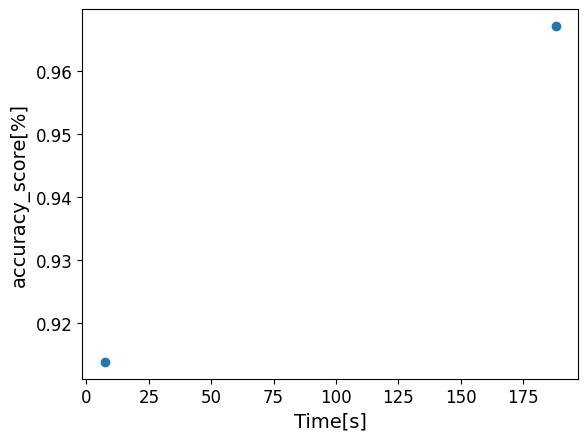

In [34]:
train_times = [train_t_rf, train_t_log]
accuracy_scores = [rf_accuracy, log_accuracy]
plt.scatter(train_times, accuracy_scores)
plt.xlabel('Time[s]')
plt.ylabel('accuracy_score[%]')